In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque

Matplotlib is building the font cache; this may take a moment.


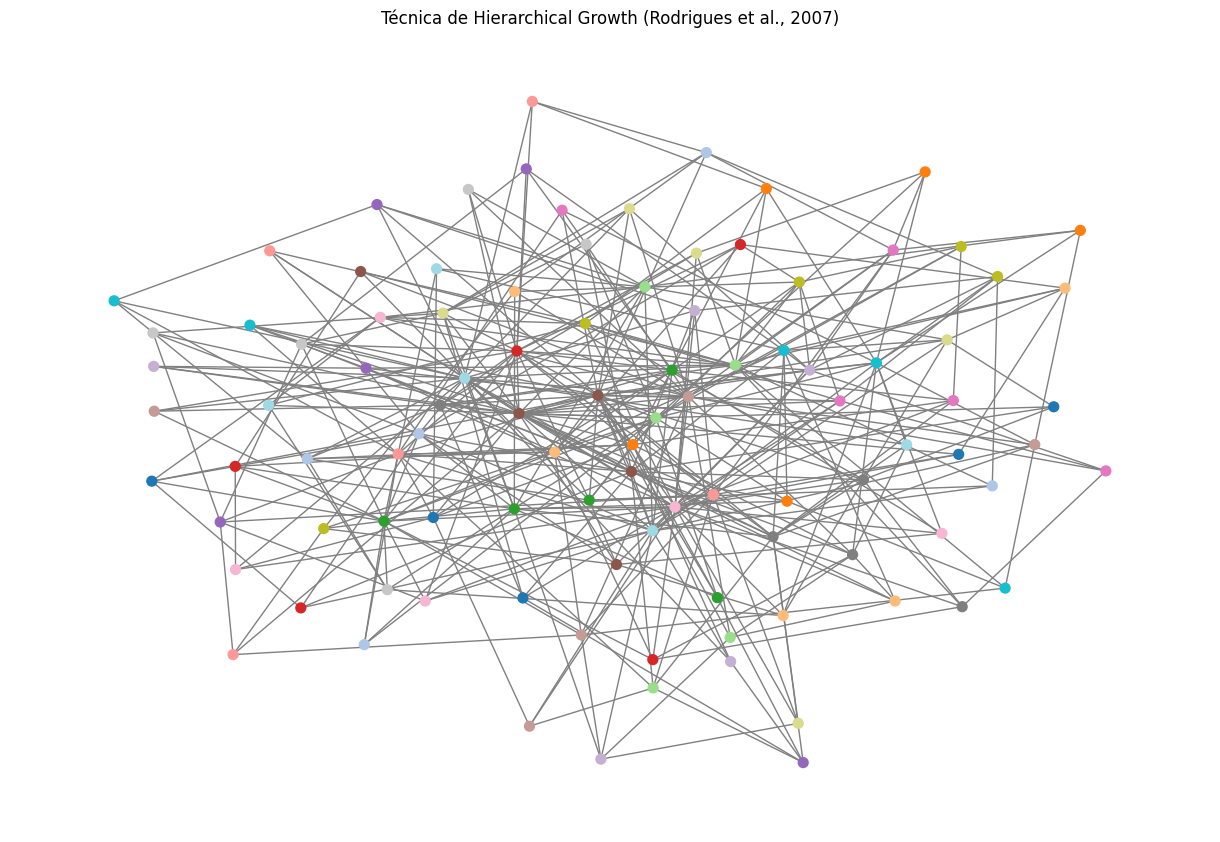

100 comunidades detectadas pela Técnica 3


In [3]:
# Carregar a rede
edges = []
with open("scale_free_network.txt") as f:
    for line in f:
        if line.strip():
            u, v = map(int, line.strip().split())
            edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# Função para crescer uma comunidade a partir de um nó semente
def hierarchical_growth(G, seed, visited):
    community = set([seed])
    frontier = set(G.neighbors(seed)) - visited

    while frontier:
        best_gain = -1
        best_node = None
        for node in frontier:
            neighbors = set(G.neighbors(node))
            internal = len(neighbors & community)
            external = len(neighbors - community)
            gain = internal / (external + 1)  # fórmula adaptada

            if gain > best_gain:
                best_gain = gain
                best_node = node

        if best_gain < 0.5:
            break  # critério de parada

        community.add(best_node)
        visited.add(best_node)
        frontier = (frontier | set(G.neighbors(best_node))) - community

    return community

# Detectar todas as comunidades
all_communities = []
visited = set()
nodes = list(G.nodes())
random.shuffle(nodes)  # ordem aleatória para independência

for node in nodes:
    if node not in visited:
        visited.add(node)
        community = hierarchical_growth(G, node, visited)
        all_communities.append(community)

# Mapear comunidades para cores
node_color_map = {}
for i, comm in enumerate(all_communities):
    for node in comm:
        node_color_map[node] = i

num_comms = len(all_communities)
colors = [plt.cm.tab20(node_color_map[n] % 20) for n in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    node_color=colors,
    node_size=50,
    with_labels=False,
    edge_color="gray"
)
plt.title("Técnica de Hierarchical Growth (Rodrigues et al., 2007)")
plt.show()

print(f"{len(all_communities)} comunidades detectadas pela Técnica 3")